# Examples of the pyrankability package

In [10]:
from IPython.core.display import display, HTML
import pandas as pd
import numpy as np
import copy
import os
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import networkx as nx
from numpy import ix_
import numpy as np

In [6]:
import sys
sys.path.insert(0,"~/rankability_toolbox")

In [7]:
import pyrankability

In [23]:
G.edges()

OutMultiEdgeDataView([(0, 1, {}), (0, 3, {}), (0, 6, {}), (1, 3, {}), (1, 3, {}), (1, 6, {}), (2, 4, {}), (2, 9, {}), (2, 9, {}), (3, 3, {}), (3, 3, {}), (3, 5, {}), (4, 3, {}), (4, 3, {}), (4, 1, {}), (5, 3, {}), (5, 3, {}), (5, 5, {}), (6, 3, {}), (6, 4, {}), (6, 2, {}), (7, 3, {}), (7, 3, {}), (7, 3, {}), (8, 9, {}), (8, 3, {}), (8, 3, {}), (9, 6, {}), (9, 6, {}), (9, 5, {})])

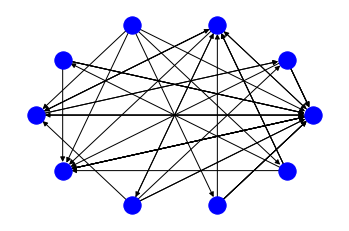

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

G = nx.generators.directed.random_k_out_graph(10, 5, 0.5,self_loops=False,seed=42)
pos = nx.layout.circular_layout(G)

nodes = nx.draw_networkx_nodes(G, pos, node_color='blue')
nodes = nx.draw_networkx_edges(G, pos, node_color='blue')

ax = plt.gca()
ax.set_axis_off()
plt.show()

In [46]:
Ddict = {}
for u,v in G.edges():
    if (u,v) not in Ddict:
        Ddict[(u,v)] = 0
    Ddict[(u,v)] += 1
# Make sure there are entries in there for everything
for u in G.nodes():
    for v in G.nodes():
        if u!=v and (u,v) not in Ddict:
            Ddict[(u,v)] = np.NaN
D = pd.Series(list(Ddict.values()),index=pd.MultiIndex.from_tuples(list(Ddict.keys())))
D.unstack()

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0
4,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
8,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,3.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [47]:
D.unstack().fillna(0).values

array([[0., 0., 1., 0., 0., 1., 3., 0., 0., 0.],
       [4., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 2., 1., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 0., 1., 1.],
       [4., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [2., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [2., 1., 1., 0., 0., 1., 0., 0., 0., 0.],
       [4., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 1., 0., 1., 0., 0., 0.]])

In [50]:
k,details = pyrankability.lop.lp(D.unstack().fillna(0).values)
k

43.00000000000276

In [51]:
k_bilp,details_bilp = pyrankability.lop.lp(D.unstack().fillna(0).values)
k_bilp

43.00000000000276

In [55]:
pd.DataFrame(Xstar)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.000000,1.000000,0.714734,1.000000,1.000000,1.000000,1.000000,1.0,1.0
1,0.000000,1.000000,0.690078,0.611643,1.000000,1.000000,1.000000,1.000000,1.0,1.0
2,0.000000,0.309922,1.000000,0.595635,1.000000,0.753600,1.000000,1.000000,1.0,1.0
3,0.285266,0.388357,0.404365,1.000000,0.692366,0.766697,1.000000,1.000000,1.0,1.0
4,0.000000,0.000000,0.000000,0.307634,1.000000,0.538228,1.000000,1.000000,1.0,1.0
5,0.000000,0.000000,0.246400,0.233303,0.461772,1.000000,0.529289,0.753869,1.0,1.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.470711,1.000000,1.000000,1.0,1.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.246131,0.000000,1.000000,1.0,1.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0


In [52]:
Xstar = pyrankability.lop.threshold_x(details['x'],lower_cut=1e-3,upper_cut=1-1e-3)

record_ixs = []
r = np.sum(Xstar,axis=1)
ixs = np.argsort(-1*r)
record_ixs.append(ixs)
Xstar_rowsum = Xstar[np.ix_(ixs,ixs)]

r = np.sum(details_bilp['x'],axis=1)
ixs = np.argsort(-1*r)
record_ixs.append(ixs)
Xstar_bilp = Xstar[np.ix_(ixs,ixs)]

labels = ["A. BILP by rowsum", "B. Ordered by rowsum"]
Xstars = [Xstar_bilp,Xstar_rowsum]

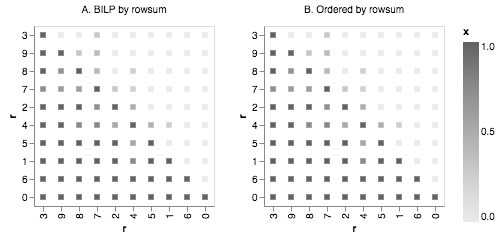

In [56]:
import altair as alt
alt.data_transformers.disable_max_rows()

all_df = pd.DataFrame(columns=["i","j","x","Label","oi","oj"])
for ix,Xstar in enumerate(Xstars):
    x = pd.DataFrame(Xstar)
    df = x.stack().reset_index()
    df.columns=["i","j","x"]
    df["oi"] = df["i"].copy()
    df["oj"] = df["j"].copy()
    df["i"] = record_ixs[ix][df["i"]]
    df["j"] = record_ixs[ix][df["j"]]
    df["Label"] = labels[ix]
    all_df = all_df.append(df)

#all_df = all_df.loc[(all_df.x != 0) & (all_df.x != 1)]
alt.Chart(all_df).mark_square().encode(
    x=alt.X(
        'i:N',
        axis=alt.Axis(labelOverlap="parity"),
        title="r",
        sort=alt.EncodingSortField(field="oi",order="ascending") # The order to sort in
    ),
    y=alt.Y(
        'j:N',
        axis=alt.Axis(labelOverlap="parity"),
        title="r",
        sort=alt.EncodingSortField(field="oj",order="ascending") # The order to sort in
    ),
    color=alt.Color("x",scale=alt.Scale(scheme='greys'))
).properties(
    width=180,
    height=180
).facet(
    column=alt.Column("Label:N", title=None)
).resolve_scale(x='independent',y='independent')

In [99]:
k_exhaustive,details_exhaustive = pyrankability.lop.objective_count_exhaustive(D.unstack().fillna(0).values,details['x'])

In [100]:
k,k_exhaustive,len(details_exhaustive['P'])

(43.00000000000276, 43.0, 50)

In [115]:
P,info = pyrankability.lop.find_P_from_x(D.unstack().fillna(0).values,k,details)

Going to loop for 128.0


In [116]:
len(P)

50

In [117]:
info['num_removed']

515

In [94]:
len(set(details_exhaustive['P'])-set([tuple(Pspec) for Pspec in P]))+len(P)

3628800

[0, 6, 1, 2, 5, 8, 4, 3, 9, 7]

In [92]:
details_exhaustive['P'][0]

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)